## Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

## Acquiring

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

With the cleanliness of the initial data set, there is little to prepare for this project for the time being

## Explore

### Univariate

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Text(0, 0.5, 'Count')

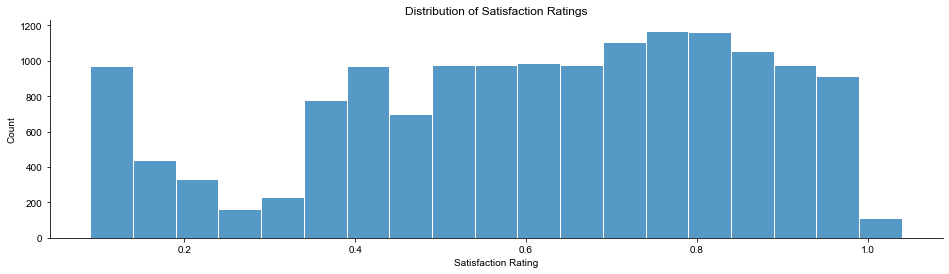

In [7]:
plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.histplot(data = df, x = 'satisfaction_level', binwidth = .05).set_title('Distribution of Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Population')

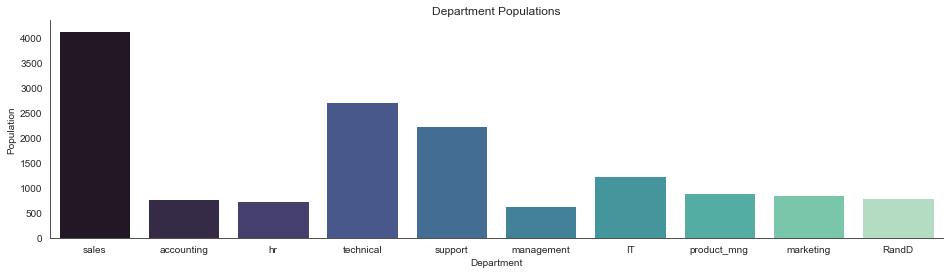

In [8]:
plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.countplot(data = df, x = 'Department', palette = 'mako').set_title('Department Populations')
plt.xlabel('Department')
plt.ylabel('Population')

Text(0, 0.5, 'Count')

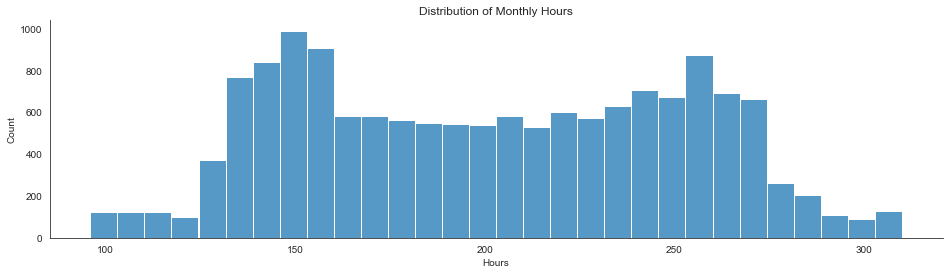

In [9]:
plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.histplot(data = df, x = 'average_montly_hours').set_title('Distribution of Monthly Hours')
plt.xlabel('Hours')
plt.ylabel('Count')

Text(0, 0.5, 'Population')

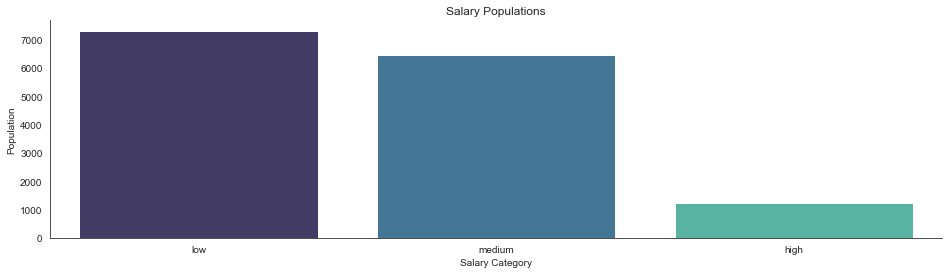

In [10]:
plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.countplot(data = df, x = 'salary', palette = 'mako').set_title('Salary Populations')
plt.xlabel('Salary Category')
plt.ylabel('Population')

### Bivariate

In [11]:
# Splitting
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df['left'])
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train['left'])

            left
salary          
high    0.066289
low     0.296884
medium  0.204313


Text(0, 0.5, 'Count')

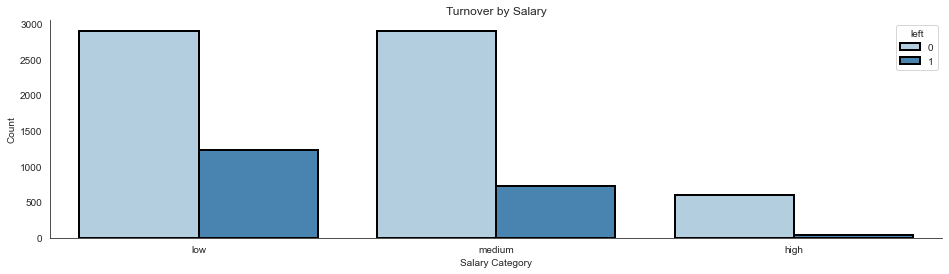

In [12]:
# Percent of workers that turned over grouped by salary category on top, with a graph showing counts of those
# workers who left vs. those who didn't in each salary category
# It would seem those high salary workers don't turn over too much and the low salaries turn over the most

print(pd.DataFrame(df.groupby('salary').left.mean()))

plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.countplot(x = 'salary', hue = 'left', data=train, palette='Blues', ec='black', linewidth=2).set_title('Turnover by Salary')
plt.xlabel('Salary Category')
plt.ylabel('Count')

                 left
Department           
IT           0.222494
RandD        0.153748
accounting   0.265971
hr           0.290934
management   0.144444
marketing    0.236597
product_mng  0.219512
sales        0.244928
support      0.248991
technical    0.256250


Text(0, 0.5, 'Count')

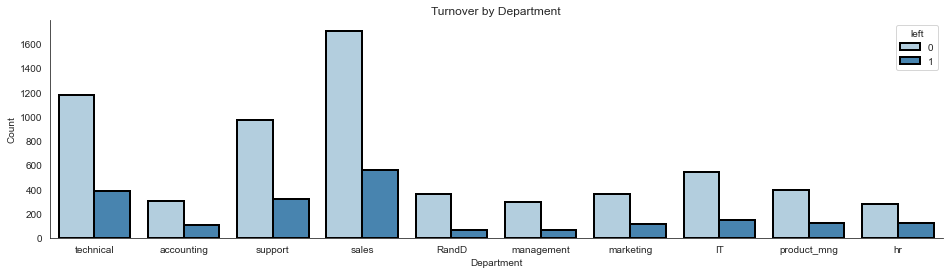

In [13]:
# Percent of workers that turned over grouped by department on top, with a graph showing counts of those
# workers who left vs. those who didn't in each department
# HR has got the greatest turnover rate

print(pd.DataFrame(df.groupby('Department').left.mean()))

plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.countplot(x = 'Department', hue = 'left', data=train, palette='Blues', ec='black', linewidth=2).set_title('Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Count')

                           left
promotion_last_5years          
0                      0.241962
1                      0.059561


Text(0, 0.5, 'Count')

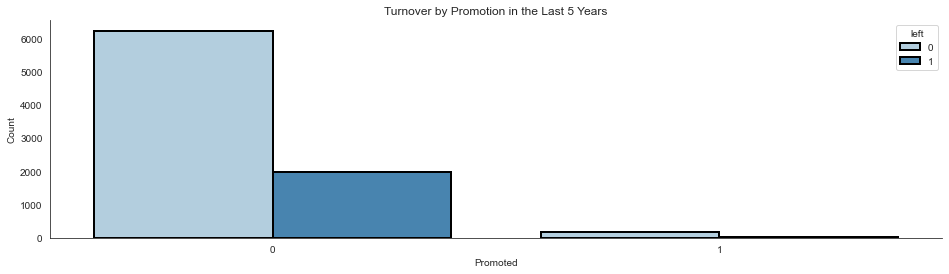

In [14]:
# Percent of workers that turned over grouped by if they were promoted in the last 5 years, with a graph showing 
# counts of thoseworkers who left vs. those who didn't grouped by if they were promoted or not
# Not surprising that those that weren't promoted in the last 5 years were about four times more likely to quit

print(pd.DataFrame(df.groupby('promotion_last_5years').left.mean()))

plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.countplot(x = 'promotion_last_5years', hue = 'left', data=train, palette='Blues', ec='black', linewidth=2).set_title('Turnover by Promotion in the Last 5 Years')
plt.xlabel('Promoted')
plt.ylabel('Count')

      satisfaction_level
left                    
0               0.666810
1               0.440098


Text(0, 0.5, 'Satisfaction Rating')

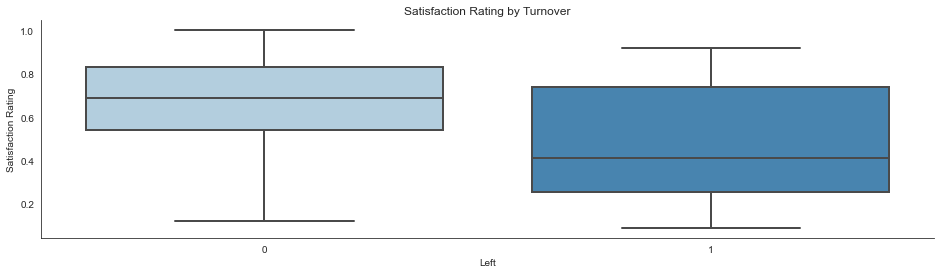

In [15]:
# Left vs. average satisfaction rating on top, with a boxplot showing the distribution of satisfaction ratings 
# between those who left vs. those who did not.
# Those who left were more likely to rate poorly and have more extreme ratings towards the negative end

print(pd.DataFrame(df.groupby('left').satisfaction_level.mean()))

plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.boxplot(x = 'left', y = 'satisfaction_level', data=train, palette='Blues', linewidth=2).set_title('Satisfaction Rating by Turnover')
plt.xlabel('Left')
plt.ylabel('Satisfaction Rating')

        satisfaction_level
salary                    
high              0.637470
low               0.600753
medium            0.621817


Text(0, 0.5, 'Satisfaction Rating')

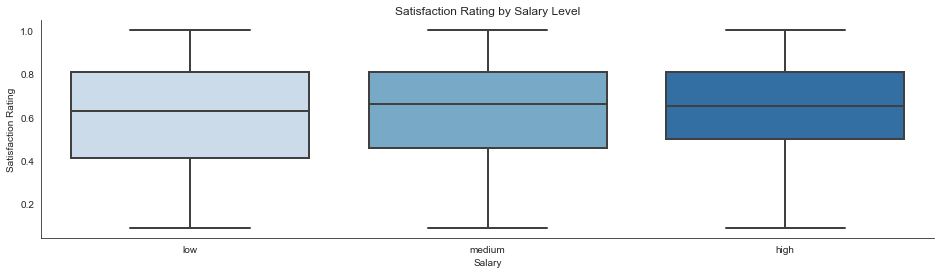

In [16]:
# Showing the satisfaction levels for each salary level
# High salary workers had a fairly normal distribution where the medium and low salary workers skewed 
# towards the lower ratings, and variability increases as salary goes down

print(pd.DataFrame(df.groupby('salary').satisfaction_level.mean()))

plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.boxplot(x = 'salary', y = 'satisfaction_level', data=train, palette='Blues', linewidth=2).set_title('Satisfaction Rating by Salary Level')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Rating')

                   left
Work_accident          
0              0.265160
1              0.077916


Text(0, 0.5, 'Count')

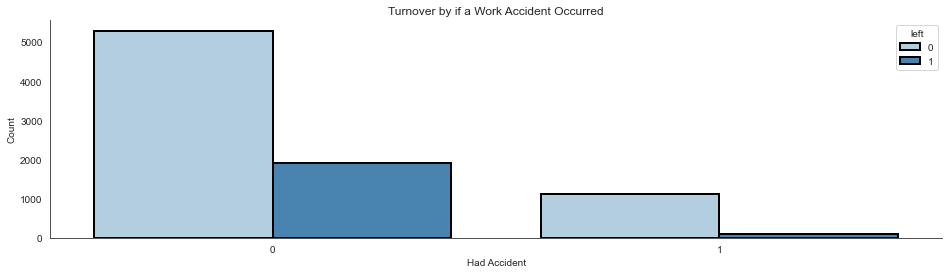

In [17]:
# Showing turnover rates by if a work accident has occurred
# It seems those that did have a work accident were less likely to leave

print(pd.DataFrame(df.groupby('Work_accident').left.mean()))

plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.countplot(x = 'Work_accident', hue = 'left', data=train, palette='Blues', ec='black', linewidth=2).set_title('Turnover by if a Work Accident Occurred')
plt.xlabel('Had Accident')
plt.ylabel('Count')

Text(0, 0.5, 'Satisfaction Rating')

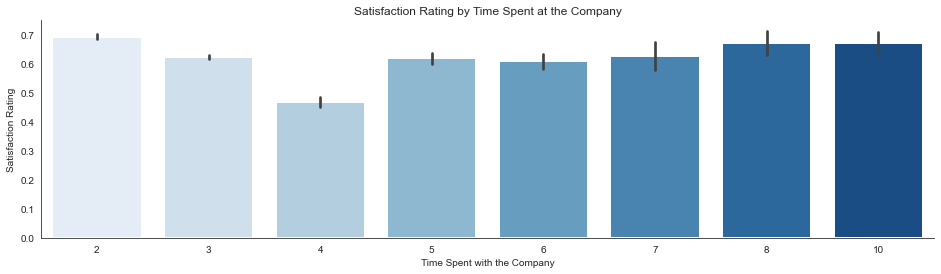

In [18]:
# A plot showing satisfaction rating for differing amounts of time with the company

plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.barplot(x = 'time_spend_company', y = 'satisfaction_level', data=train, palette='Blues', linewidth=2).set_title('Satisfaction Rating by Time Spent at the Company')
plt.xlabel('Time Spent with the Company')
plt.ylabel('Satisfaction Rating')

Text(0, 0.5, 'Satisfaction Rating')

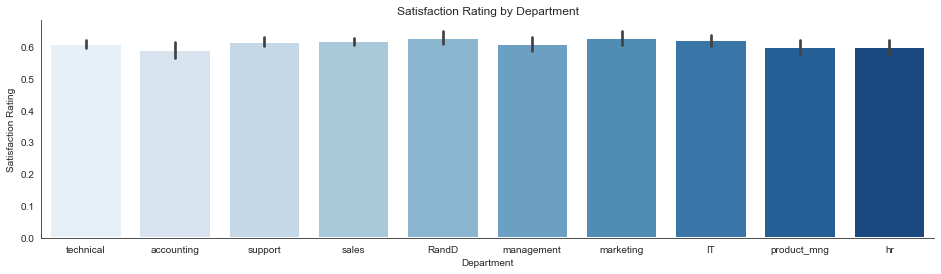

In [19]:
plt.subplots(figsize=(16, 4))
sns.set_style(style='white') 
sns.despine()
sns.barplot(x = 'Department', y = 'satisfaction_level', data=train, palette='Blues', linewidth=2).set_title('Satisfaction Rating by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Rating')

## Statistical Testing

#### Test #1: Are those who were promoted in the last 5 years less likely to leave?

- Null hypothesis: There is no difference in the number of people who left between those who were promoted and those who were not
- Alternative hypothesis: There is a difference in the number of people who left between those who were promoted and those who were not

In [20]:
observed = pd.crosstab(train.promotion_last_5years, train.left)

chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p

(30.033978351523935, 4.245416977529534e-08)

With a p-value falling to almost zero, I can safely conclude that there is likely a difference in the turnover rate between those that were promoted in the last 5 years and those that were not.

#### Test #2: Is there a difference in the average satisfaction rating between those that left and those that did not?

- Null hypothesis: There is no difference in the average satisfaction rating between those that left the company and those that did not
- Alternative hypothesis: There is a difference in the average satisfaction rating between those that left the company and those that did not

In [21]:
x1 = train[train['left'] == 1].satisfaction_level
x2 = train[train['left'] == 0].satisfaction_level

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-36.69759785376089, pvalue=1.395252298433503e-273)

With a p-value falling to almost zero, I can safely conclude that there is likely a difference in the average satisfaction rating between those that left the company and those that did not.